In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
dataset=load_digits()

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
dataset.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
dataset.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
len(dataset.data)

1797

In [9]:
x=dataset.data[:-1]
y=dataset.target[:-1]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
y_pred=knn.predict(x_test)
y_pred

array([0, 9, 2, 3, 6, 7, 8, 9, 9, 1, 3, 9, 1, 0, 1, 0, 0, 5, 0, 3, 2, 1,
       1, 1, 8, 1, 6, 5, 0, 6, 8, 4, 0, 7, 2, 2, 0, 9, 5, 5, 3, 4, 9, 5,
       0, 1, 5, 3, 0, 4, 4, 5, 1, 5, 6, 2, 8, 8, 2, 2, 8, 4, 2, 0, 3, 6,
       9, 8, 9, 3, 3, 4, 2, 2, 7, 2, 7, 4, 1, 9, 7, 4, 0, 8, 0, 9, 2, 1,
       1, 2, 6, 6, 0, 3, 3, 2, 3, 9, 5, 2, 4, 0, 4, 2, 9, 9, 5, 9, 1, 1,
       9, 2, 7, 6, 6, 2, 2, 2, 6, 9, 5, 0, 1, 1, 4, 2, 3, 8, 6, 0, 3, 6,
       6, 9, 9, 7, 2, 7, 3, 0, 5, 5, 9, 3, 6, 4, 4, 1, 2, 3, 3, 6, 9, 1,
       1, 3, 8, 3, 1, 0, 6, 4, 5, 1, 7, 1, 7, 0, 7, 9, 3, 8, 5, 9, 4, 1,
       8, 0, 8, 3, 4, 8, 4, 3, 9, 3, 2, 9, 1, 0, 6, 7, 8, 1, 0, 8, 3, 9,
       9, 0, 6, 2, 1, 7, 6, 2, 9, 2, 5, 9, 0, 8, 8, 2, 6, 6, 8, 3, 3, 5,
       2, 4, 4, 4, 4, 3, 3, 5, 3, 4, 8, 4, 8, 3, 7, 1, 1, 9, 3, 3, 1, 1,
       8, 8, 4, 5, 9, 9, 5, 7, 5, 4, 3, 8, 1, 1, 5, 0, 9, 2, 3, 0, 6, 9,
       5, 4, 7, 5, 9, 1, 8, 2, 8, 5, 5, 8, 0, 8, 1, 9, 0, 2, 1, 5, 0, 1,
       2, 9, 4, 7, 6, 3, 7, 9, 5, 1, 4, 9, 0, 9, 9,

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
test_score=accuracy_score(y_pred,y_test)
print('Accuracy on the testing subset: {:.3f}'.format(test_score))
train_score=knn.score(x_train,y_train)
print('Accuracy on the training subset: {:.3f}'.format(train_score))

Accuracy on the testing subset: 0.981
Accuracy on the training subset: 0.990


In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,0,0
1,9,9
2,2,2
3,3,3
4,6,6


In [15]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[58  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  0  0  0  0  0]
 [ 0  0 58  0  0  0  0  0  0  0]
 [ 0  0  0 59  0  0  0  1  0  0]
 [ 0  0  0  0 46  0  0  0  1  0]
 [ 0  0  0  0  0 51  1  0  0  1]
 [ 0  0  0  0  0  0 48  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  1  0  1  0  0  0  1 44  0]
 [ 0  1  0  0  0  0  0  0  2 64]]


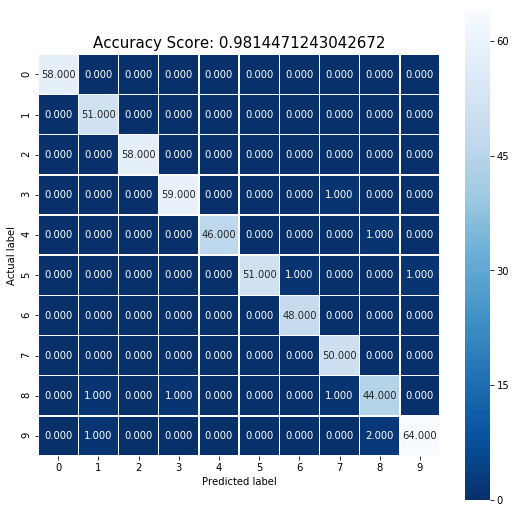

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(test_score)
plt.title(title, size = 15);

In [17]:
print("Classification Report")
clr=classification_report(y_test, y_pred, labels=[1, 0])
print(clr)

Classification Report
             precision    recall  f1-score   support

          1       0.96      1.00      0.98        51
          0       1.00      1.00      1.00        58

avg / total       0.98      1.00      0.99       109

